# Financial Data - Preliminary Analysis

---

Preliminary exploration of APIs and defining useful concepts.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import yfinance as yf

## Data Download

Use Yahoo Finance for ease.


In [2]:
tickers = [
    "AAPL",  # Apple Inc.
    "TSLA",  # Tesla Inc.
    "GOOG",  # Alphabet Inc.
    "MSFT",  # Microsoft Corporation
    "NVDA",  # NVIDIA Corporation
    "SPY",  # SPDR S&P 500 ETF Trust
    "QQQ",  # Invesco QQQ Trust
    "IWM",  # iShares Russell 2000 ETF
    "GLD",  # SPDR Gold Shares
    "TLT",  # iShares 20+ Year Treasury Bond ETF
]

data = yf.download(tickers, start="2010-01-01", end="2023-01-01")
close = data.Close
data.head(5)

/tmp/ipykernel_3341/1085590896.py:14: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start="2010-01-01", end="2023-01-01")


[                       0%                       ]

[**********            20%                       ]  2 of 10 completed

[**************        30%                       ]  3 of 10 completed

[*******************   40%                       ]  4 of 10 completed

[**********************50%                       ]  5 of 10 completed

[**********************60%****                   ]  6 of 10 completed

[**********************70%*********              ]  7 of 10 completed

[**********************80%*************          ]  8 of 10 completed

[**********************90%******************     ]  9 of 10 completed

[*********************100%***********************]  10 of 10 completed

Price          Close                                                         \
Ticker          AAPL         GLD       GOOG        IWM       MSFT      NVDA   
Date                                                                          
2010-01-04  6.418385  109.800003  15.504140  51.630493  23.130053  0.423830   
2010-01-05  6.429478  109.699997  15.435864  51.452969  23.137527  0.430019   
2010-01-06  6.327210  111.510002  15.046746  51.404545  22.995535  0.432770   
2010-01-07  6.315514  110.820000  14.696465  51.783825  22.756390  0.424289   
2010-01-08  6.357502  111.370003  14.892385  52.066257  22.913321  0.425206   

Price                                             ...     Volume            \
Ticker            QQQ        SPY        TLT TSLA  ...       AAPL       GLD   
Date                                              ...                        
2010-01-04  40.393566  85.279190  56.984097  NaN  ...  493729600  16224100   
2010-01-05  40.393566  85.504990  57.352100  NaN  ...  601904800  14213100   
2010-01-06  40.149937  85.565132  56.584370  NaN  ...  552160000  24981900   
2010-01-07  40.176014  85.926315  56.679550  NaN  ...  477131200  13609800   
2010-01-08  40.506687  86.212296  56.654121  NaN  ...  447610800  15894600   

Price                                                                      \
Ticker           GOOG       IWM      MSFT       NVDA       QQQ        SPY   
Date                                                                        
2010-01-04   78541293  42863900  38409100  800204000  62822800  118944600   
2010-01-05  120638494  55523100  49749600  728648000  62935600  111579900   
2010-01-06  159744526  59708600  58182400  649168000  96033000  116074400   
2010-01-07  257533695  56123500  50559700  547792000  77094100  131091100   
2010-01-08  189680313  48811500  51197400  478168000  88886600  126402800   

Price                     
Ticker          TLT TSLA  
Date                      
2010-01-04  2829100  NaN  
2010-01-05  2841600  NaN  
2010-01-06  4099600  NaN  
2010-01-07  2793200  NaN  
2010-01-08  2910700  NaN  

[5 rows x 50 columns]

## Returns

We use log returns:
$$
r_t = \log\left(\frac{P_t}{P_{t-1}}\right)
$$

This has a multitude of benefits:
1. Adding returns is easy:
$$ 
\sum_{t=1}^n r_t = \sum_{t=1}^n \log\left(\frac{P_t}{P_{t-1}}\right) = \sum_{t=1}^n \log(P_t) - \log(P_{t-1}) = \log(P_n) - \log(P_0)
$$
2. Symmetry:
Log returns are symmetric: $\log{\left(\frac{110}{100}\right)} = -\log{\left(\frac{100}{110}\right)}$. Simple returns don't have this property.

In [3]:
log_returns = np.log(close / close.shift(1)).dropna() * 100
simple_returns = close.pct_change().dropna() * 100

In [4]:
log_returns.head(5)

Ticker,AAPL,GLD,GOOG,IWM,MSFT,NVDA,QQQ,SPY,TLT,TSLA
Date,,,,,,,,,,
2010-06-30,-1.827893,0.337521,-2.070780,-1.154933,-1.295362,-2.610110,-1.533519,-0.954536,0.670531,-0.251464
2010-07-01,-1.220022,-3.887889,-1.234687,-0.722488,0.649762,1.651322,-0.281386,-0.446643,0.157621,-8.172292
2010-07-02,-0.621681,1.231279,-0.671199,-1.098933,0.473843,-1.260322,-0.282097,-0.546489,-0.800467,-13.431235
2010-07-06,0.682066,-1.685143,-0.110016,-1.312503,2.336087,-1.078954,0.305560,0.653411,0.820156,-17.547006
2010-07-07,3.958673,1.041677,3.188905,3.429679,1.995064,4.719216,3.142617,3.101042,-1.177973,-1.943053


In [5]:
simple_returns.head(5)

Ticker,AAPL,GLD,GOOG,IWM,MSFT,NVDA,QQQ,SPY,TLT,TSLA
Date,,,,,,,,,,
2010-06-30,-1.811288,0.338092,-2.049486,-1.148289,-1.287008,-2.576341,-1.521821,-0.949994,0.672785,-0.251148
2010-07-01,-1.212610,-3.813280,-1.227096,-0.719884,0.651878,1.665032,-0.280990,-0.445647,0.157745,-7.847274
2010-07-02,-0.619752,1.238890,-0.668951,-1.092917,0.474967,-1.252413,-0.281700,-0.544998,-0.797271,-12.568307
2010-07-06,0.684397,-1.671024,-0.109955,-1.303927,2.363587,-1.073154,0.306028,0.655550,0.823529,-16.093748
2010-07-07,4.038073,1.047121,3.240296,3.489170,2.015098,4.832344,3.192519,3.149626,-1.171062,-1.924298


In [6]:
def plot_returns(returns: pd.DataFrame, return_type: str = "Log Returns"):
    _fig, axes = plt.subplots(2, 5, figsize=(20, 8))
    axes = axes.flatten()  # Make 1D for easy indexing

    for i, ticker in enumerate(tickers):
        ax = axes[i]
        sns.histplot(returns[ticker], bins=50, kde=True, ax=ax, alpha=0.8)
        ax.set_title(f"{ticker}\n(std={returns[ticker].std():.1f}%)")
        ax.grid(True, alpha=0.3)

    plt.suptitle(f"{return_type} Distributions", fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

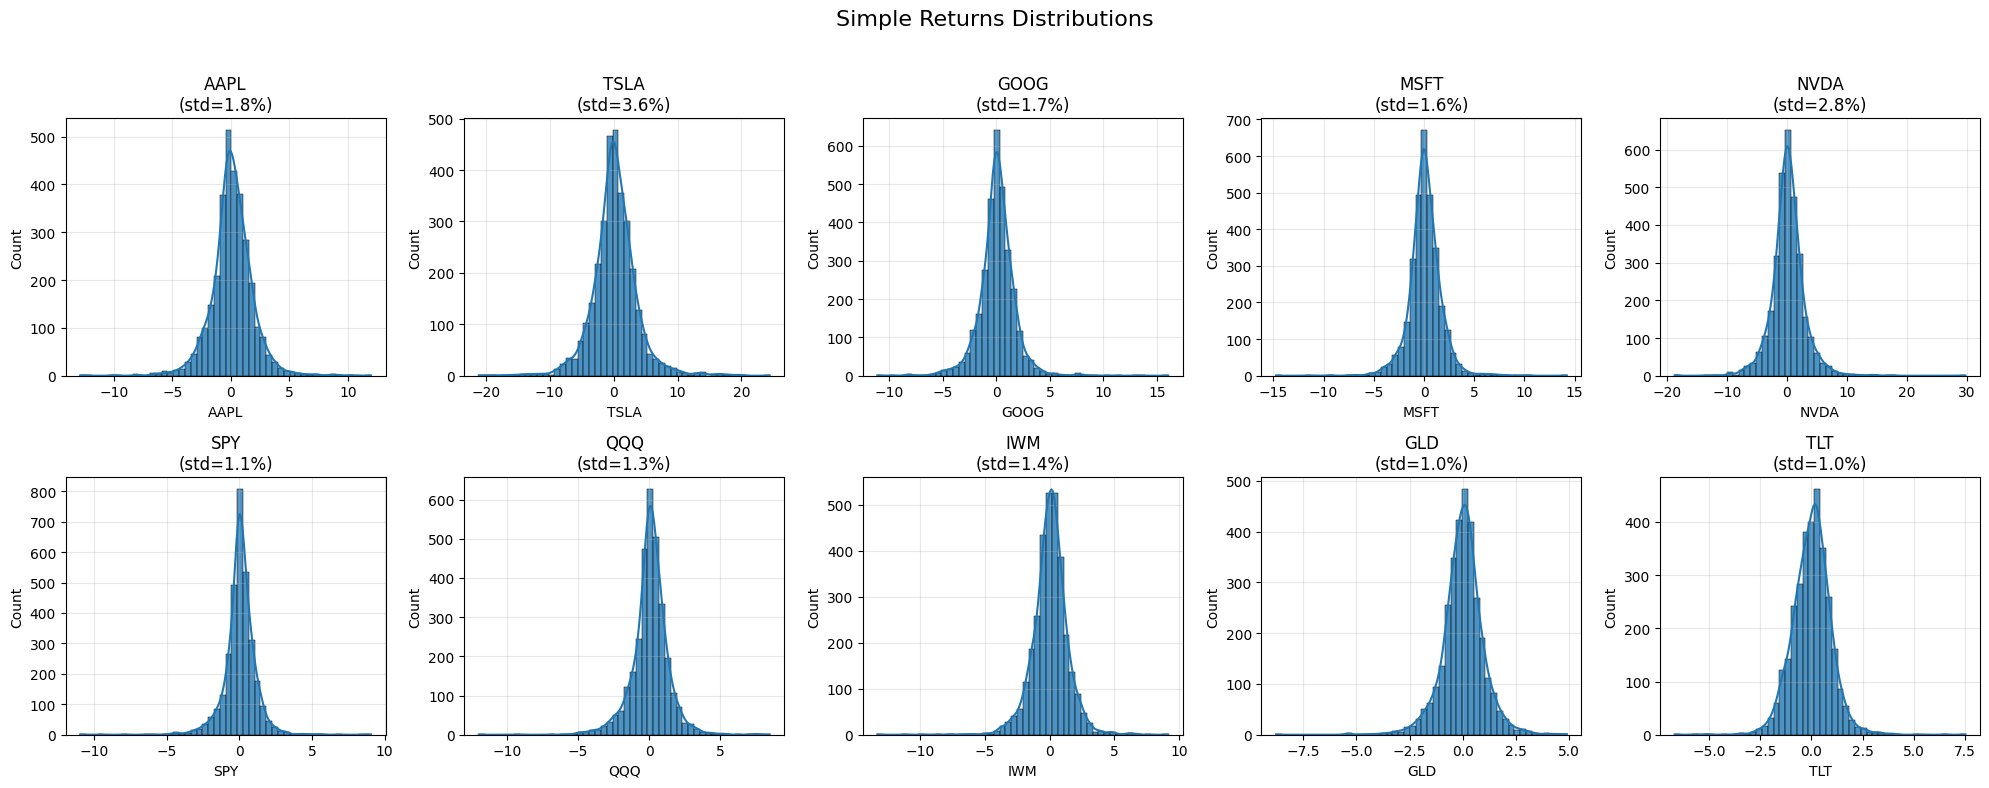

In [7]:
plot_returns(simple_returns, return_type="Simple Returns")

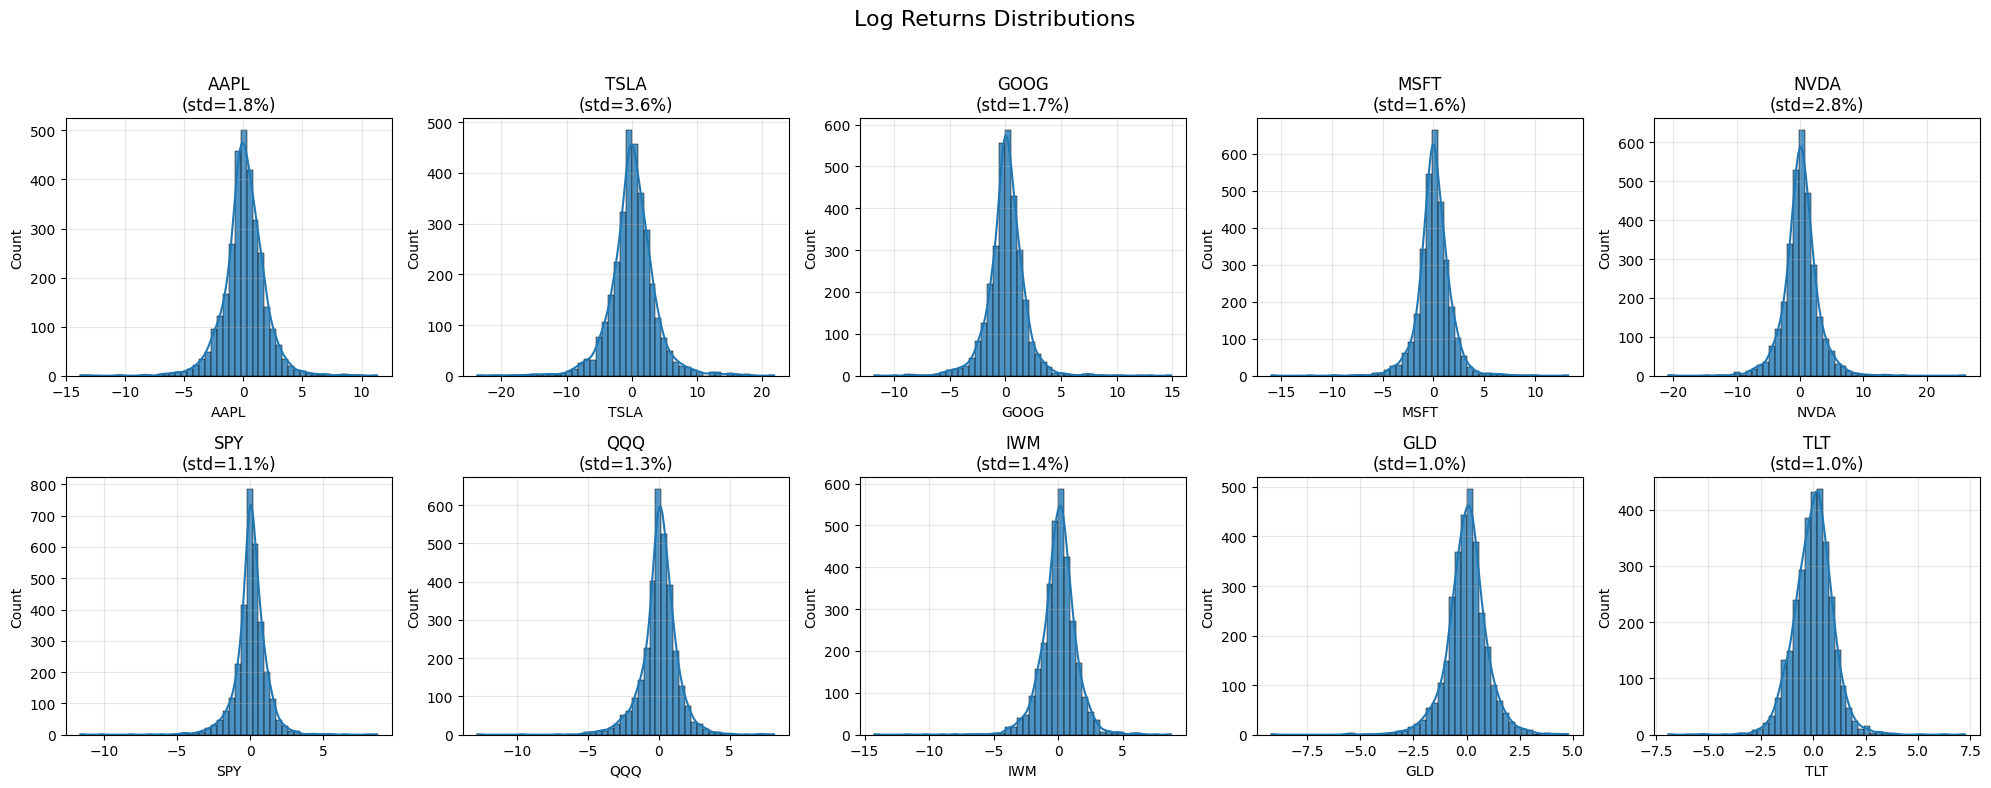

In [8]:
plot_returns(log_returns)

In [9]:
def rolling_sharpe(
    returns: pd.DataFrame,
    window: int = 252,
    risk_free_annual: float = 0.02,
    periods_per_year: int = 252,
) -> pd.DataFrame:
    """
    Computes rolling annualized Sharpe ratio for each ticker.

    The Sharpe ratio is defined as the ratio of the average excess return
    (over the risk-free rate) to the standard deviation of excess returns.
    This function calculates the rolling Sharpe ratio over a specified window.
    1. Convert annual risk-free rate to daily.
    2. Compute excess returns by subtracting daily risk-free rate.
    3. Calculate rolling mean and std deviation of excess returns.
    4. Compute rolling Sharpe ratio and annualize it.
    5. Return a DataFrame of rolling annualized Sharpe ratios.
    """
    rf_daily = (1 + risk_free_annual) ** (1 / periods_per_year) - 1
    excess = returns - rf_daily
    roll_mean = excess.rolling(window).mean()
    roll_std = excess.rolling(window).std(ddof=1)
    sharpe_raw = roll_mean / roll_std
    sharpe_annual = sharpe_raw * np.sqrt(periods_per_year)
    return sharpe_annual

In [10]:
sharpe = rolling_sharpe(log_returns, window=252)
sharpe[sharpe > 0].dropna()

Ticker,AAPL,GLD,GOOG,IWM,MSFT,NVDA,QQQ,SPY,TLT,TSLA
Date,,,,,,,,,,
2011-07-08,1.545776,1.683503,0.511049,1.555826,0.667653,0.811585,1.845645,1.743464,0.016047,0.872861
2011-07-11,1.509360,1.808719,0.406476,1.498935,0.493764,0.700566,1.696577,1.589933,0.114985,0.880402
2011-07-12,1.617580,1.802937,0.348508,1.331232,0.413305,0.602455,1.568161,1.456960,0.193041,0.766131
2011-07-13,1.655123,1.866834,0.362586,1.392796,0.367128,0.578006,1.562644,1.481690,0.146354,0.646385
2011-07-19,1.917709,1.994259,0.835766,1.517965,0.532576,0.579058,1.731365,1.632770,0.067771,0.566862
...,...,...,...,...,...,...,...,...,...,...
2021-02-11,1.080938,0.734000,0.811151,0.751586,0.658416,1.367193,0.998691,0.487190,0.243827,1.951656
2021-02-12,1.100075,0.691040,0.827015,0.752079,0.675412,1.344919,1.017573,0.504865,0.167430,1.905435
2021-02-16,1.064307,0.597471,0.838010,0.746126,0.643354,1.278207,1.002148,0.497574,0.075492,1.881194


## Covariance Matrix

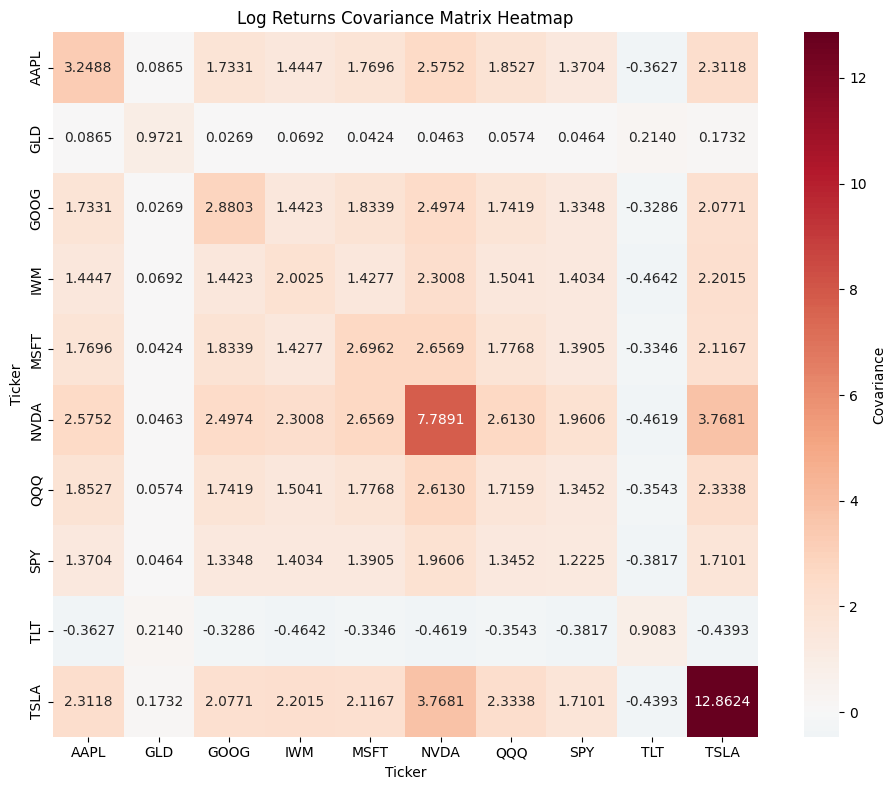

In [11]:
# Compute covariance matrix
cov_matrix = log_returns.cov()

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    cov_matrix,
    annot=True,
    cmap="RdBu_r",  # Red=positive, Blue=negative
    center=0,
    fmt=".4f",
    square=True,
    cbar_kws={"label": "Covariance"},
)
plt.title("Log Returns Covariance Matrix Heatmap")
plt.tight_layout()
plt.show()